<a href="https://colab.research.google.com/github/davis689/binder/blob/master/Maxwell_Boltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy as sp
from sympy import oo, exp, sin, pi
import matplotlib.pyplot as plt
import numpy as np
sp.init_printing()


# Maxwell-Boltzmann distribution

In [9]:
eps,m,T,K=sp.symbols('varepsilon,m,T,K',positive=True,real=True)
vx,vy,vz,fvx,fex,fv=sp.symbols('v_x,v_y,v_z,f_{v_x},f_x,f_v',real=True)
kb=sp.symbols('k_B',constant=True,positive=True,real=True)

#One dimension# 
We begin with the Boltzmann distribution in one dimension. $$f(\varepsilon_i)=\left(\frac{1}{\sum_{j=0}^{\infty} e^{-ɛ_j/kT} }\right)e^{-\varepsilon_i/kT}$$ The term in parentheses is just a number and since we'll be normalizing our expression later, let's simplify this as just $K$.

In [ ]:
mbx=sp.Eq(fvx,K*sp.exp(-eps/kb/T))
mbx

The energy levels we're going to consider here are the energies of motion, $\frac{1}{2} m v_x^2$. Let's substitute this into our expression.

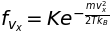

In [ ]:
mbx=mbx.subs(eps,m*vx**2/2)
mbx

Since we're deriving an expression for the *fraction* of molecules, we can normalize this expression to determine an expression for $K$. Since the sum of fractions over the whole range of velocities will be unity, our expression will be $$\int^\infty_{-\infty}K e^{-\frac{m v_x^2}{2k_B T}}=1$$ For the purposes *sympy*, to solve for K we need the expression to be solved to be equal to zero so we'll move the 1 over to the left hand side of the equation.

Here we'll solve for the normalization coefficient and call it *norm*. We'll then substitute it for K in the Maxwell-Boltzmann expression.

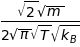

In [ ]:
norm=sp.solve(sp.integrate(mbx.rhs,(vx,-oo,oo))-1,K)[0] # solve returns a list. There is only one solution so [0] will get it.
norm

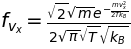

In [ ]:
mbx=mbx.subs(K,norm) # substitute the normalization coefficient into the distribution
mbx

To make sure this expression is indeed normalized, we can integrate it over the whole range and we should get 1. 

In [ ]:
sp.integrate(mbx.rhs,(vx,-oo,oo))

One disadvange of using the computer to do our math is that the final form might not match what we would do if we did the work on paper. In the case of the Maxwell-Boltzmann distribution, we can combine terms under one square root and obtain $$f_{v_x} = \sqrt{\dfrac{m}{2 \pi k_B T}} e^ {-\frac{m v_x^2}{2 k_B T}}$$

#Three dimensions#
To change to three dimensions, we realize that there is no real difference between molecules moving in any of the three dimensions so the $v_y$ function should look the same except with $v_y$ substituted for $v_x$. The overall distribution function is just the product of the three one-dimenional functions.

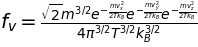

In [ ]:
mb3d=sp.Eq(fv,mbx.rhs*mbx.subs(vx,vy).rhs*mbx.subs(vx,vz).rhs)
mb3d

Of course, if we're looking at motion in three dimensions, we probably are much more interested in velocity in any direction rather than the three components of velocity along the axes. We can substitute $v^2=v_x^2+v_y^2+v_z^2$. 

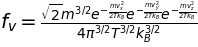

In [ ]:
v,dv=sp.symbols('v,dv',real=True,positive=True)
mb3d.subs(vx**2+vy**2+vz**2,v**2)

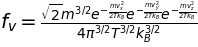

In [ ]:
sp.powsimp(mb3d.subs(vx**2+vy**2+vz**2,v**2),force=True)

It's not clear that we can make the substitution that we want for $v$ in sympy. We'll have to do it another way. 

Since $v^2=v_x^2+v_y^2+v_z^2$ and since there's no difference between the values of $v_x$, $v_y$, and $v_z$, we can just write $v^2=3 v_x^2$ or $v_x=v/\sqrt{3}$.

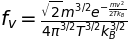

In [ ]:
mb3d=sp.Eq(fv,mb3d.rhs.subs(vx,v/sp.sqrt(3)).subs(vy,v/sp.sqrt(3)).subs(vz,v/sp.sqrt(3)))
mb3d

In actuality our function equation is multiplied on both sides by infinitessimals. Our fraction in terms of velocity components should actually be written as $$f_vdv_xdv_ydv_z=\dfrac{\sqrt{2}m^{3/2}e^{mv_x^2/2k_BT}e^{mv_y^2/2k_BT}e^{mv_z^2/2k_BT}}{(4\pi k_BT)^{3/2}}dv_xdv_ydv_z$$
When we switch over to $v$, we're effectively switching to spherical polar coordinates. Two of our three variables become the angles $\theta$ and $\phi$.
To allow us to focus on only the magnitude of $v$, we integrate over all possible angles and fold this into $f_v$.

In [ ]:
theta,phi=sp.symbols('theta, phi')
anglefactor=sp.integrate(sp.integrate(v**2*sp.sin(theta),(theta,0,sp.pi)),(phi,0,2*sp.pi))
anglefactor

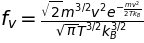

In [ ]:
mb3d=sp.Eq(mb3d.lhs,mb3d.rhs*anglefactor)
mb3d

##Graphing Interlude

You may already know how to plot in sympy. You may skip to the next section. If you know how to plot in matplotlib, that is different and you may find the following useful.

In order to plot our functions we need to add a a plot function to our repertoire. `from sympy.plotting import plot` gets us this function.

Enter that here.

Now if we want to plot a equation, let's say, it's $y=a x^2 + b x + c$, we can do that. First define the variables. We can but don't have tell sympy to assume that they're real, positive, etc. That's useful if you're integrating complicated expressions or simplifying things. Here we'll skip that part and just define the symbols. Next define the equation. Enter the left-hand-side in front of the comma and the right-hand-side after it.

In [ ]:
y,x,a,b,c=sp.symbols('y,x,a,b,c')
q_eq=sp.Eq( y, a*x**2+b*x+c) #named q_eq because it's a quadratic equation but we can call it whatever we want.

Now we're ready to plot but we'll need to know what $a$, $b$, and $c$ are. If we just define these variables, we'll have ruined the generality of our equation until we undefine the variables. It's useful to have a function to substitute values into our equation without actually changing the equation. We can do that with `subs`. We can substitute a=2 into the right-hand-side of the equation with `q_eq.rhs.subs(a,2)`. If we want b=-1 and c=4, just append `.subs(b,-1).subs(c,4)` to the end of that. Do that below and call the new expression q_eq1 and display the results.

Now that we have an expression, we can plot it with `plot(expression,(indep variable,lowerlimit,upperlimit))`

Do this for our q_eq1 for $x$ from -3 to 3.

You notice some gobbledygook at the botton of the plot. We can get rid of this but just assigning our plot to a name (here let's name it `qplot`) and ending our plot code with `qplot.show()`. 

In [ ]:
qplot=plot() # complete the plot command
qplot.show()

We don't actually have to define a new expression and substitute it before we can plot. We can do it all in the plot command. Here we'll add a second quadratic equation to our plot. Let's use a=1, b=4, and c=7. 

`plot(q_eq.rhs.subs()...`

We can plot an additional curve on our original plot by putting our plot command inside the parentheses in `qplot.extend()`. Do this.

The plot command probably worked but made two plots instead of one. We can make it combine them by telling the plot function to hold off plotting until we're all done. Do this by adding `,show=False` after the plot command (but inside the parentheses). 

We can also make the plot colors distinct by appending `,line_color='r'` where the 'r' is for red. Other colors are 

*  b: blue
*  g: green
*  c: cyan
*  m: magenta
*  y: yellow
*  k: black




Make these changes

We can also do things like change the axis labels. `,xlabel('distance (m)')` would add information to the label. `,ylabel('velocity (m/s)'` does the same thing for the $y$-axis. We only need to do this in the first plot command.

We can label each of our two plots with descriptive information using `,label='water at 298 K'` or whatever. The adding `,legend=True` will show the label for each graph.

##Graphing Maxwell-Boltzmann

In [7]:
from sympy.plotting import plot # We don't need this if we've already done it in the previous section but it doesn't hurt anything
from scipy.constants import Avogadro, Boltzmann
k_b=Boltzmann # we can use k_b (not kb) to get the value of the Boltzmann constant
NA=Avogadro

Now let's plot our distribution functions starting with the one-dimensional Maxwell-Boltzmann distribution. We called it `mbx`. Here it is.

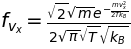

In [ ]:
mbx

There are a number of substitutions that need to be made. If we want to use molar masses instead of molecular masses, we can use $R$ (8.314 J/molK) instead of $k_B$. Remember to use kg for mass. Plot at 298 K for He between -3000 and 3000 m/s and add a plot for Ar in the same limits.

Do this again for He at 150 K, 300 K, and 450 K.

Now do a similar comparison series for the three-dimensional Maxwell-Boltzmann distribution, `mb3d`. Plot between 0 and 5000 m/s.

##making funtions on the fly


In [ ]:
He=sp.lambdify(v,mb3d.rhs.subs(kb,8.314).subs(T,298).subs(m,0.004).evalf())
Ar=sp.lambdify(v,mb3d.rhs.subs(kb,8.314).subs(T,298).subs(m,0.040).evalf())
speed=np.linspace(0,5000,200)

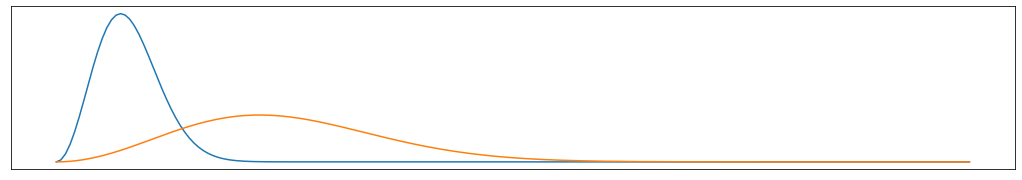

In [ ]:
plt.figure(figsize=(18,3))
plt.plot(speed,Ar(speed) )
plt.plot(speed,He(speed))
plt.xticks([])
plt.yticks([])
plt.savefig('mbbanner.jpg')
plt.show()

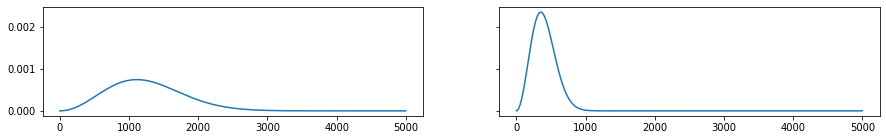

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,2))
ax1.plot(speed,He(speed))
ax2.plot(speed,Ar(speed))

Make a set of graphs for Ar at 298 K vs Ar at 500 K.

# Averages
Now that we a distribution function that gives the fraction of molecules going each speed, we can use it to get average values.

To obtain averages we need to weight each possible speed by the fraction of molecules going that speed and add up the results. In other words, $$\left<v\right> = \int^{oo}_0v f(v)dv$$

To integrate use `sp.integrate(expression,(indepvariable,lowerlimit,upperlimit))`
Find an expression for the average speed of molecules moving in three-dimensions.

Use `subs` to find a value for the average speed for He and for Ar at 298 K.

Do the same for the $x$-component of the velocity. What are the limits in this case?

Do it again for only positive values of velocity. (or negative ones).

A similar technique can get the average squared speed in 1D and 3D.

Find an expression for the average cubed speed. Not that anyone cares about this but we can do it just the same.

The average kinetic energy expression should work just the same. Find this expression too for 1D and 3D.

In [ ]:
      # average kinetic energy

# Collision Frequncy


In [3]:
cs,N1,N2,V=sp.symbols('sigma,N_1,N_2,V')

Define `v_avg` to be the average speed in three dimensions.

The collision frequency is the cross-sectional area multiplied by the average speed multiplied by the density of molecules.

In [ ]:
Z1=cs*v_avg*N1/V
Z1

Find the collision frequency of an Ar atom at 298 in one mole of Ar in a 24 L container. The $\sigma$ of Ar is 140 pm.

The collision frequency of a second type of molecule with the original molecules would be just the same except multiplied by 

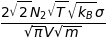

In [ ]:
Z2=cs*v_avg*N2/V
Z2

In [ ]:
round(Z2.subs(N2,Avogadro).subs(V,.024).subs(T,298).subs(cs,pi*140e-12**2).subs(kb,Boltzmann).subs(m,0.040/Avogadro).evalf(),2)

In [ ]:
vr=v_avg*sp.integrate(sp.cos(theta),(theta,0,2*pi))
vr

It's actually not the average velocity that we want in this application. We need the average *relative* velocity. The average relative velocity is the difference between the velocity vectors of the two molecules. $\vec{v_{rel}}=\vec{v_1}-\vec{v_2}$ The magnitude of the relative velocity can be obtained from the dot product of the relative velocity with itself. $$v_{rel}=\sqrt{\vec{v_{rel}}\cdot\vec{v_{rel}}}=\sqrt{\left(\vec{v_1}-\vec{v_2}\right)\cdot\left(\vec{v_1}-\vec{v_2}\right)}=\sqrt{\vec{v_1}^2-2\vec{v_1}\cdot\vec{v_2}+\vec{v_2}^2}$$
For random, uncorrelated velocity vectors, the $\vec{v_1}\cdot\vec{v_2}=0$ so $$\vec{v_{rel}}=\sqrt{\vec{v_1}^2+\vec{v_2}^2}$$  Since the two velocity vectors are the same $$\vec{v_{rel}}=\sqrt{2\vec{v_1}^2}=\sqrt{2}\left<v\right>$$

In [ ]:
Z1=cs*v_avg*sp.sqrt(2)*N1/V
Z1

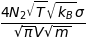

In [ ]:
Z2=cs*v_avg*sp.sqrt(2)*N2/V
Z2

In [ ]:
print(round(Z2.subs(N2,Avogadro).subs(V,.024).subs(T,298).subs(cs,pi*140e-12**2).subs(kb,Boltzmann).subs(m,0.040/Avogadro).evalf(),2),"1/s")

862828163.58 1/s


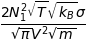

In [ ]:
Z11=N1/V*Z1/2
Z11

In [ ]:
print(round(Z11.subs(N2,Avogadro).subs(N1,Avogadro).subs(V,.024).subs(T,298).subs(cs,pi*140e-12**2).subs(kb,Boltzmann).subs(m,0.040/Avogadro).evalf(),2),"1/s")

# Mean Free Path

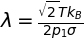

In [ ]:
mfp,p1=sp.symbols('lambda,p_1')
expr2=sp.Eq(mfp,v_avg/Z1)
expr2.subs(V/N1,kb*T/p1)

In [ ]:
sp.Eq(mfp,expr2.rhs.subs(V/N1,kb*T/p1).subs(T,298).subs(p1,100000).subs(kb,1.38e-23).subs(cs,pi*140e-12**2).evalf())

In [ ]:
expr2.subs(V/N1,kb*T/p1).subs(T,298).subs(p1,100000).subs(kb,1.38e-23).subs(cs,pi*140e-12**2).evalf()